In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
data=pd.read_csv('/content/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# checking the null values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<Figure size 1000x1100 with 0 Axes>

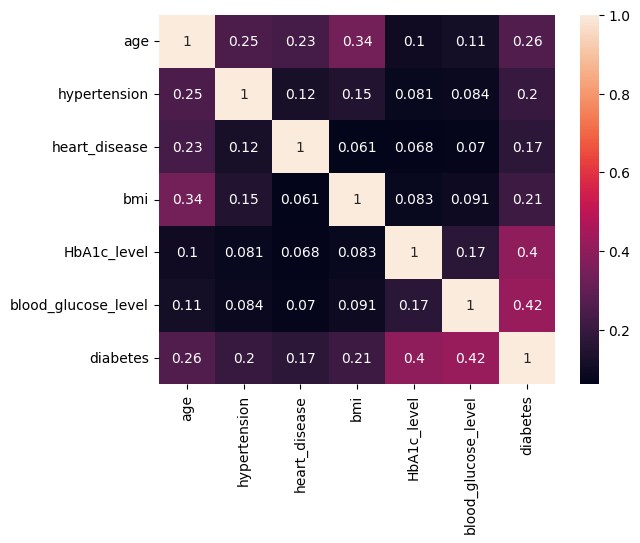

<Figure size 1000x1100 with 0 Axes>

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.figure(figsize=(10,11))

In [ ]:
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [ ]:
data.replace({'gender':{'Male':0,'Female':1,'Other':2}},inplace=True)


In [ ]:
data['gender'].value_counts()

1        58552
0        41430
Other       18
Name: gender, dtype: int64

In [ ]:
data['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
data.replace({'smoking_history':{'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5}},inplace=True)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,0,76.0,1,1,3,20.14,4.8,155,0


In [ ]:
# Separting the dependent and independent fearures
X=data.drop(columns='diabetes')
y=data['diabetes']

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.0,0,1,1,25.19,6.6,140
1,1,54.0,0,0,0,27.32,6.6,80
2,0,28.0,0,0,1,27.32,5.7,158
3,1,36.0,0,0,3,23.45,5.0,155
4,0,76.0,1,1,3,20.14,4.8,155


In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(100000, 8) (67000, 8) (33000, 8)


In [26]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [33]:
parameter={
    'n_estimators':[40,50,60,70,80,90,100,110,120,130,140,150,160],
    'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],

}

In [36]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(adc,parameter,cv=5,scoring='accuracy')


In [37]:
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'n_estimators': [40, 50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160]},
                   scoring='accuracy')

In [38]:
df=pd.DataFrame(cv.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.178794,0.443909,0.267652,0.044953,150,0.8,"{'n_estimators': 150, 'learning_rate': 0.8}",0.972612,0.970597,0.973433,0.971343,0.971493,0.971896,0.001003,6
1,3.855669,0.386128,0.244502,0.038835,140,1,"{'n_estimators': 140, 'learning_rate': 1}",0.972388,0.970970,0.973209,0.971045,0.971866,0.971896,0.000842,6
2,6.380471,2.349011,0.318847,0.100149,150,0.2,"{'n_estimators': 150, 'learning_rate': 0.2}",0.972687,0.970746,0.973433,0.971418,0.971642,0.971985,0.000955,2
3,1.460884,0.234402,0.091212,0.016057,50,0.3,"{'n_estimators': 50, 'learning_rate': 0.3}",0.972463,0.970896,0.973209,0.971119,0.971567,0.971851,0.000866,8
4,4.588721,0.533056,0.297719,0.059541,160,0.8,"{'n_estimators': 160, 'learning_rate': 0.8}",0.972388,0.970522,0.973358,0.971343,0.971493,0.971821,0.000970,9
5,2.454821,0.237666,0.159583,0.024495,90,0.3,"{'n_estimators': 90, 'learning_rate': 0.3}",0.972612,0.970746,0.973433,0.971418,0.971791,0.972000,0.000936,1
6,2.802216,0.855250,0.161233,0.029168,90,0.6,"{'n_estimators': 90, 'learning_rate': 0.6}",0.972612,0.970821,0.973358,0.971493,0.971418,0.971940,0.000915,4
7,4.097331,0.495695,0.243175,0.031960,140,0.7,"{'n_estimators': 140, 'learning_rate': 0.7}",0.972463,0.970821,0.973358,0.971418,0.971493,0.971910,0.000895,5
8,4.112520,0.348799,0.251320,0.002415,160,1,"{'n_estimators': 160, 'learning_rate': 1}",0.972612,0.970970,0.973209,0.971045,0.972015,0.971970,0.000872,3
9,1.964629,0.208319,0.124388,0.021025,70,0.9,"{'n_estimators': 70, 'learning_rate': 0.9}",0.972164,0.970746,0.973209,0.971343,0.971418,0.971776,0.000846,10


In [39]:
cv.best_params_

{'n_estimators': 90, 'learning_rate': 0.3}

In [41]:
best_score=cv.best_score_
print(best_score)

0.9720000000000001


In [43]:
y_pred=cv.predict(X_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     30216
           1       1.00      0.67      0.80      2784

    accuracy                           0.97     33000
   macro avg       0.98      0.84      0.89     33000
weighted avg       0.97      0.97      0.97     33000

